In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.oauth2 import service_account
from google.cloud import bigquery



In [2]:
def extract():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.events`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)


In [3]:
data = extract()
data



,index,city,client_event_time,country,device_model,event_id,event_type,is_attribution_event,language,os_version,region,session_id,start_version,user_creation_time,user_id,id,Renewal_Type
0,7699,Kuwait City,2022-03-01 17:35:17.600000+00:00,Kuwait,iPad Pro,985,[OB] ProductSelection,False,English,15.3.1,Al Asimah,1646156080422,1.0.1,2021-11-21 13:06:43.744000+00:00,65628.0,7700,None
1,7700,Kuwait City,2022-03-01 17:35:21.439000+00:00,Kuwait,iPad Pro,986,[OB] ProductHelp,False,English,15.3.1,Al Asimah,1646156080422,1.0.1,2021-11-21 13:06:43.744000+00:00,65628.0,7701,None
2,7701,Kuwait City,2022-03-01 17:35:22.748000+00:00,Kuwait,iPad Pro,987,[OB] ProductActivation,False,English,15.3.1,Al Asimah,1646156080422,1.0.1,2021-11-21 13:06:43.744000+00:00,65628.0,7702,None
3,35982,Kuwait City,2022-03-02 07:37:38.713000+00:00,Kuwait,iPad Pro,989,[OB] ProductHelp,False,English,15.3.1,Al Asimah,1646206655497,1.0.1,2021-11-21 13:06:43.744000+00:00,65628.0,35983,None
4,35983,Kuwait City,2022-03-02 07:37:40.830000+00:00,Kuwait,iPad Pro,990,[OB] ProductActivation,False,English,15.3.1,Al Asimah,1646206655497,1.0.1,2021-11-21 13:06:43.744000+00:00,65628.0,35984,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320224,1244425,Central,2022-05-08 07:12:52.624000+00:00,Hong Kong,iPad Pro,174,[Scaffolding] Scaffolding,False,English,15.4.1,Central and Western District,1651992779456,2.2.3,2022-04-24 06:20:13.183000+00:00,24390.0,1244426,None
1320225,1244440,Central,2022-05-08 07:02:05.990000+00:00,Hong Kong,iPad Pro,126,[Scaffolding] Scaffolding,False,English,15.4.1,Central and Western District,1651992779456,2.2.3,2022-04-24 06:20:13.183000+00:00,24390.0,1244441,None
1320226,1244485,Central,2022-05-08 07:04:54.518000+00:00,Hong Kong,iPad Pro,139,[Scaffolding] Scaffolding,False,English,15.4.1,Central and Western District,1651992779456,2.2.3,2022-04-24 06:20:13.183000+00:00,24390.0,1244486,None
1320227,1244524,Central,2022-05-08 07:09:35.697000+00:00,Hong Kong,iPad Pro,162,[Scaffolding] Scaffolding,False,English,15.4.1,Central and Western District,1651992779456,2.2.3,2022-04-24 06:20:13.183000+00:00,24390.0,1244525,None


In [4]:
data.duplicated().sum()


0

In [ ]:
data.shape



In [33]:
# Remove duplicates
df = data.drop_duplicates()




In [34]:
#trouver la proportion de lignes nulles en% 
df.isnull().sum().sort_values(ascending = False)/len(data)*100

Renewal_Type            100.000000
city                      1.089735
region                    0.910069
os_version                0.000000
id                        0.000000
user_id                   0.000000
user_creation_time        0.000000
start_version             0.000000
session_id                0.000000
index                     0.000000
is_attribution_event      0.000000
event_type                0.000000
event_id                  0.000000
device_model              0.000000
country                   0.000000
client_event_time         0.000000
language                  0.000000
dtype: float64

In [35]:
#trouver la proportion de lignes nulles en valeur absolue
df.isnull().sum().sort_values(ascending = False)



Renewal_Type            1320229
city                      14387
region                    12015
os_version                    0
id                            0
user_id                       0
user_creation_time            0
start_version                 0
session_id                    0
index                         0
is_attribution_event          0
event_type                    0
event_id                      0
device_model                  0
country                       0
client_event_time             0
language                      0
dtype: int64

In [36]:
#drop lines with no user_id
df = df.dropna(subset=['user_id']).copy()


In [37]:
#replace by no_region if no region
df.region.replace(np.nan, "no_region", inplace=True) 

#replace by no_city if no city
df.city.replace(np.nan, "no_city", inplace=True) 


In [38]:
del df["Renewal_Type"]


In [39]:
df.isnull().sum().sort_values(ascending = False)


index                   0
city                    0
client_event_time       0
country                 0
device_model            0
event_id                0
event_type              0
is_attribution_event    0
language                0
os_version              0
region                  0
session_id              0
start_version           0
user_creation_time      0
user_id                 0
id                      0
dtype: int64

In [40]:
len(df.columns)


16

In [41]:
df.columns


Index(['index', 'city', 'client_event_time', 'country', 'device_model',
       'event_id', 'event_type', 'is_attribution_event', 'language',
       'os_version', 'region', 'session_id', 'start_version',
       'user_creation_time', 'user_id', 'id'],
      dtype='object')

In [42]:
df.nunique()


index                   1320229
city                       1969
client_event_time       1309729
country                      80
device_model                 34
event_id                  35274
event_type                   59
is_attribution_event          1
language                     17
os_version                   75
region                      426
session_id                21708
start_version                54
user_creation_time         3759
user_id                    3168
id                      1320229
dtype: int64

In [43]:
event_type_list = list(df.event_type.unique())


In [44]:
dict_event_simple = {'[Profile] Create' : "setup" ,                     
         '[Profile] Update' : "setup",                     
         '[Account] Sign In' : "setup",                    
         '[OB] ProfileName' : "setup",                     
         '[OB] ProfileBirthdate' : "setup",                    
         '[Activation] Game' : "game",                    
         '[OB] KeyRedeem' : "setup",                     
         '[OB] KeyFail' : "setup",                     
         '[OB] RenewalSelection' : "setup",                    
         '[Account] Sign Up' : "setup",                     
         '[OB] ProductSelection' : "setup",                    
         '[OB] ProductSK' : "setup",                    
         '[OB] ProductHelp' : "setup",                     
         '[OB] ProductActivation' : "setup",                     
         '[Game] Stop' : "game",
         '[OB] RenewalSuccess' : "setup",                     
         '[OB] ProductSeeMore' : "setup",                     
         '[OB] ProductOther' : "setup",                    
         '[Scaffolding] Reset' : "game",                    
         '[Account] Sign Out' : "setup",                     
         '[OB] CommPreview' : "setup",                    
         '[OB] DoYouHaveKit' : "setup",                    
         '[OB] HasKitYes' : "setup",                     
         '[OB] Email' : "setup",                    
         '[OB] VerifCode' : "setup",                     
         '[Activation] New Activation' : "setup",
         '[Activation] Product' : "setup",                     
         '[Activation] Piece' : "setup",                     
         '[OB] Success' : "setup",                    
         '[OB] RenewalFail' : "setup",                     
         '[OB] ClickTrial' : "setup",                     
         '[Popup] Open' : "setup",                    
         '[Popup] Close' : "setup",                   
         '[OB] HasKitNo' : "setup",                    
         '[OB] DiscoverTrial' : "setup",                    
         '[Account] Update Request' : "setup",                     
         '[Account] Update Success' : "setup",                    
         '[Profile] Delete' : "setup",                     
         '[OB] TrialStart' : "setup",                     
         '[OB] ClickStore' : "setup",                    
         '[OB] HasKeyNo' : "setup",                     
         '[OB] Type' : "setup",                     
         '[OB] KeySuccess' : "setup",                     
         '[Game] Pause' : "game",                    
         '[Game] Start' : "game",                    
         '[Error] Error' : "game",                     
         '[Scene] Enter' : "game",                     
         '[Scene] Leave' : "game",                    
         '[Action] Click' : "game",
         '[Activity] Stop' : "game", 
         '[Activity] Start' : "game",
         '[Activity] Good Answer' : "game", 
         '[Activity] Wrong Answer' : "game",
         '[Scaffolding] Scaffolding' : "game",                    
         '[Profile] Reset Settings and Progression' : "setup"}    


In [45]:
for el in event_type_list:
    if el not in list(dict_event_simple.keys()):        
        dict_event_simple[el] = "TO_BE_CHANGED"
        
dict_event_simple['[Toast] Appear'] = 'setup'
dict_event_simple['[Toast] Disappear'] = 'setup'
dict_event_simple['[Action] ConversionClickSubscribe'] = 'setup'
dict_event_simple['[Action] ConversionClickRedeem'] = 'setup'


In [46]:
df["event_simple"]=df["event_type"].map(dict_event_simple)



<AxesSubplot:xlabel='event_simple', ylabel='Count'>

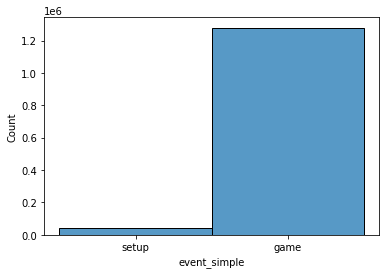

In [47]:
sns.histplot(data=df, x="event_simple")


<AxesSubplot:xlabel='event_type', ylabel='Count'>

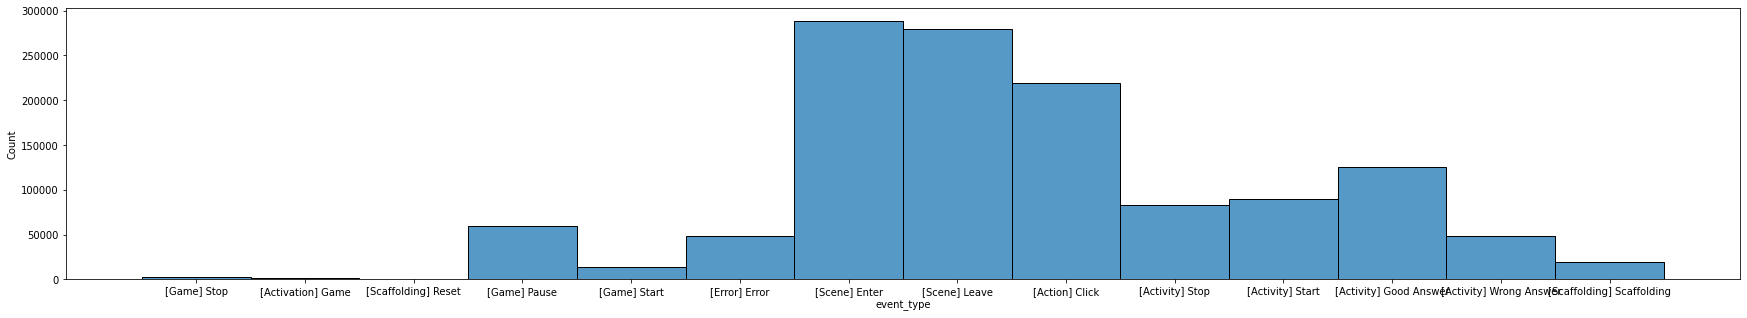

In [48]:
plt.figure(figsize=(30,5))

sns.histplot(data=df[df['event_simple']=='game'], x="event_type")


In [49]:
df[df['event_simple']=='game'].nunique()



index                   1278495
city                       1969
client_event_time       1268087
country                      80
device_model                 34
event_id                  35274
event_type                   14
is_attribution_event          1
language                     17
os_version                   75
region                      426
session_id                21708
start_version                54
user_creation_time         3759
user_id                    3166
id                      1278495
event_simple                  1
dtype: int64

In [50]:
#calculate game intensity metrics by player
#step 1 : one hot encode game feature
from sklearn.preprocessing import OneHotEncoder

# Instantiate encoder
ohe = OneHotEncoder(sparse = False) 

# Fit encoder all 55 features, not great (i want to use it only for the gaming events, but hey, you got what you got
ohe.fit(df[['event_type']]) 

# Encode + retrieve columns names
df_encoded = ohe.transform(df[['event_type']]) 
df_encoded = pd.DataFrame(df_encoded)

df_encoded.columns = ohe.get_feature_names_out()


In [51]:
df_final = pd.concat([df,df_encoded],axis=1)
df_final



,index,city,client_event_time,country,device_model,event_id,event_type,is_attribution_event,language,os_version,...,event_type_[Profile] Create,event_type_[Profile] Delete,event_type_[Profile] Reset Settings and Progression,event_type_[Profile] Update,event_type_[Scaffolding] Reset,event_type_[Scaffolding] Scaffolding,event_type_[Scene] Enter,event_type_[Scene] Leave,event_type_[Toast] Appear,event_type_[Toast] Disappear
0,7699,Kuwait City,2022-03-01 17:35:17.600000+00:00,Kuwait,iPad Pro,985,[OB] ProductSelection,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7700,Kuwait City,2022-03-01 17:35:21.439000+00:00,Kuwait,iPad Pro,986,[OB] ProductHelp,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7701,Kuwait City,2022-03-01 17:35:22.748000+00:00,Kuwait,iPad Pro,987,[OB] ProductActivation,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35982,Kuwait City,2022-03-02 07:37:38.713000+00:00,Kuwait,iPad Pro,989,[OB] ProductHelp,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35983,Kuwait City,2022-03-02 07:37:40.830000+00:00,Kuwait,iPad Pro,990,[OB] ProductActivation,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320224,1244425,Central,2022-05-08 07:12:52.624000+00:00,Hong Kong,iPad Pro,174,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1320225,1244440,Central,2022-05-08 07:02:05.990000+00:00,Hong Kong,iPad Pro,126,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1320226,1244485,Central,2022-05-08 07:04:54.518000+00:00,Hong Kong,iPad Pro,139,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1320227,1244524,Central,2022-05-08 07:09:35.697000+00:00,Hong Kong,iPad Pro,162,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# list_event = []
# for eve in list(df["event_type"].unique()):
#     list_event.append(f'df["{eve}"]')                          
# list_event

# string_event = ",".join(list_event)
# string_event                      


In [52]:
for col in list(df_final.columns):
    col_new = col.replace("[","").replace("]","").replace(" ","_")
    if col_new != col: 
        df_final[col_new] = df_final[col]
        del df_final[col]
df_final

,index,city,client_event_time,country,device_model,event_id,event_type,is_attribution_event,language,os_version,...,event_type_Profile_Create,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear
0,7699,Kuwait City,2022-03-01 17:35:17.600000+00:00,Kuwait,iPad Pro,985,[OB] ProductSelection,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7700,Kuwait City,2022-03-01 17:35:21.439000+00:00,Kuwait,iPad Pro,986,[OB] ProductHelp,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7701,Kuwait City,2022-03-01 17:35:22.748000+00:00,Kuwait,iPad Pro,987,[OB] ProductActivation,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35982,Kuwait City,2022-03-02 07:37:38.713000+00:00,Kuwait,iPad Pro,989,[OB] ProductHelp,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35983,Kuwait City,2022-03-02 07:37:40.830000+00:00,Kuwait,iPad Pro,990,[OB] ProductActivation,False,English,15.3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320224,1244425,Central,2022-05-08 07:12:52.624000+00:00,Hong Kong,iPad Pro,174,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1320225,1244440,Central,2022-05-08 07:02:05.990000+00:00,Hong Kong,iPad Pro,126,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1320226,1244485,Central,2022-05-08 07:04:54.518000+00:00,Hong Kong,iPad Pro,139,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1320227,1244524,Central,2022-05-08 07:09:35.697000+00:00,Hong Kong,iPad Pro,162,[Scaffolding] Scaffolding,False,English,15.4.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
df_final.columns


Index(['index', 'city', 'client_event_time', 'country', 'device_model',
       'event_id', 'event_type', 'is_attribution_event', 'language',
       'os_version', 'region', 'session_id', 'start_version',
       'user_creation_time', 'user_id', 'id', 'event_simple',
       'event_type_Account_Sign_In', 'event_type_Account_Sign_Out',
       'event_type_Account_Sign_Up', 'event_type_Account_Update_Request',
       'event_type_Account_Update_Success', 'event_type_Action_Click',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubscribe',
       'event_type_Activation_Game', 'event_type_Activation_New_Activation',
       'event_type_Activation_Piece', 'event_type_Activation_Product',
       'event_type_Activity_Good_Answer', 'event_type_Activity_Start',
       'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer',
       'event_type_Error_Error', 'event_type_Game_Pause',
       'event_type_Game_Start', 'event_type_Game_Stop',
       'event_t

In [ ]:
Index(['index', 
       '', 
    
        
      
 
       '],
      dtype='object')

In [ ]:
user_base = df_final[["user_id","user_creation_time"]]

for col in list(df_final.columns):
    if col in ['index','id','session_id','event_id']:
        col_series = df_final.groupby("user_id").count()[col]
        user_base = pd.merge(user_base, col_series, on="user_id", how="left")
#    elif col in ['client_event_time','city','is_attribution_event','language','os_version','region','country','device_model',
#        'start_version']:
#         #last client event time
    elif "event_type_" in col:
        col_series = df_final.groupby("user_id").sum()[col]
        user_base = pd.merge(user_base, col_series, on="user_id", how="left")
    
    
user_base


